# Prueba técnica
Experto Ciencia de Datos

## Análisis exploratorio de datos

In [1]:

import numpy as np
import pandas as pd

import missingno as msno
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar datos desde un archivo Parquet
df = pd.read_parquet('../data/df_prueba.parquet.gzip')
# Resumen básico
print(df['TIPO'].value_counts())
df.groupby('TIPO')['REV_TOTAL'].describe()

TIPO
Base     490841
Churn      9159
Name: count, dtype: int64


,count,mean,std,min,25%,50%,75%,max
TIPO,,,,,,,,
Base,490841.0,8335.644410,11535.99367,-82047.0,15.0,2927.0,14774.00,234862.0
Churn,6404.0,6241.660993,9903.52322,-18418.0,0.0,1507.5,9177.75,148900.0


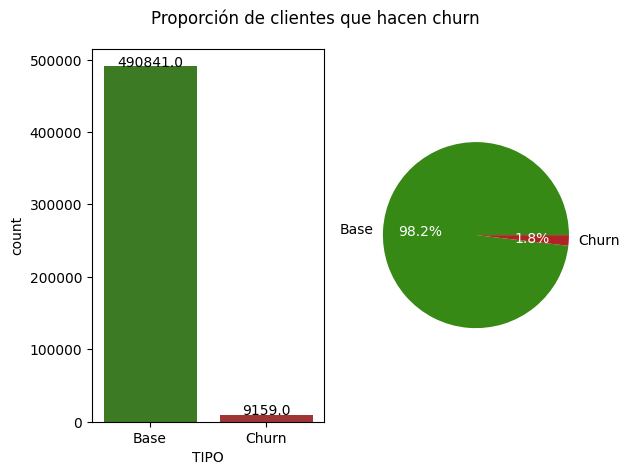

In [3]:
fig, axs = plt.subplots(nrows=1,ncols=2)
# Distribución de churn
Titulo = 'Proporción de clientes que hacen churn'
colors = ['#368915', '#B12323']
sns.countplot(x='TIPO', hue='TIPO', data=df, ax=axs[0], palette=colors)
for p in axs[0].patches:
    axs[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline')

axs[1] = df['TIPO'].value_counts(normalize=True).plot(kind='pie', ylabel='', colors=colors, autopct='%1.1f%%')
for text in list(axs[1].texts)[1::2]:
    text.set_color('white')
fig.suptitle(Titulo)
fig.tight_layout()
#sns.boxplot(x='TIPO', data=df)
#sns.countplot(x='TIPO', data=df_sample)
plt.show()

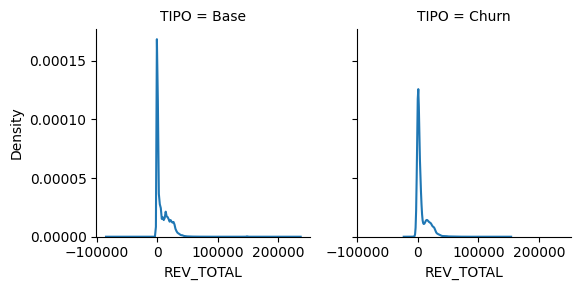

In [4]:
g = sns.FacetGrid(df, col="TIPO")
g.map(sns.kdeplot, "REV_TOTAL")

pqt_mas_comprado_M.3     62.3302
qty_pqt_M.3              62.3302
pqt_mas_comprado_M.2     59.4736
qty_pqt_M.2              59.4736
pqt_mas_comprado_M.1     54.3636
qty_pqt_M.1              54.3636
PQT_MAS_COMPRADO         52.9568
QTY_PQT                  52.9568
DIAS_INACTIVIDAD          6.0460
ACTIVATION_CHANNEL        0.5568
QTY_RCHG                  0.5510
REV_OUT_INFORMATION       0.5510
BUSINESS_UNIT             0.5510
TECHNOLOGY                0.5510
DEVICE_TECHNOLOGY         0.5510
DATA_USR                  0.5510
DEVICE_TYPE               0.5510
REGIONAL                  0.5510
DEPARTMENT                0.5510
CITY                      0.5510
CONSUMO_DATOS             0.5510
REV_OUT_SOLUTIONS         0.5510
REV_OUT_ENTERTAIMENT      0.5510
AMNT_RCHG                 0.5510
REV_OUT_COMMUNICATION     0.5510
MSG_OUT                   0.5510
MINUTES_OUT               0.5510
CALLS_OUT                 0.5510
AGEING                    0.5510
MINUTES_IN                0.5510
CALLS_IN  

<Axes: >

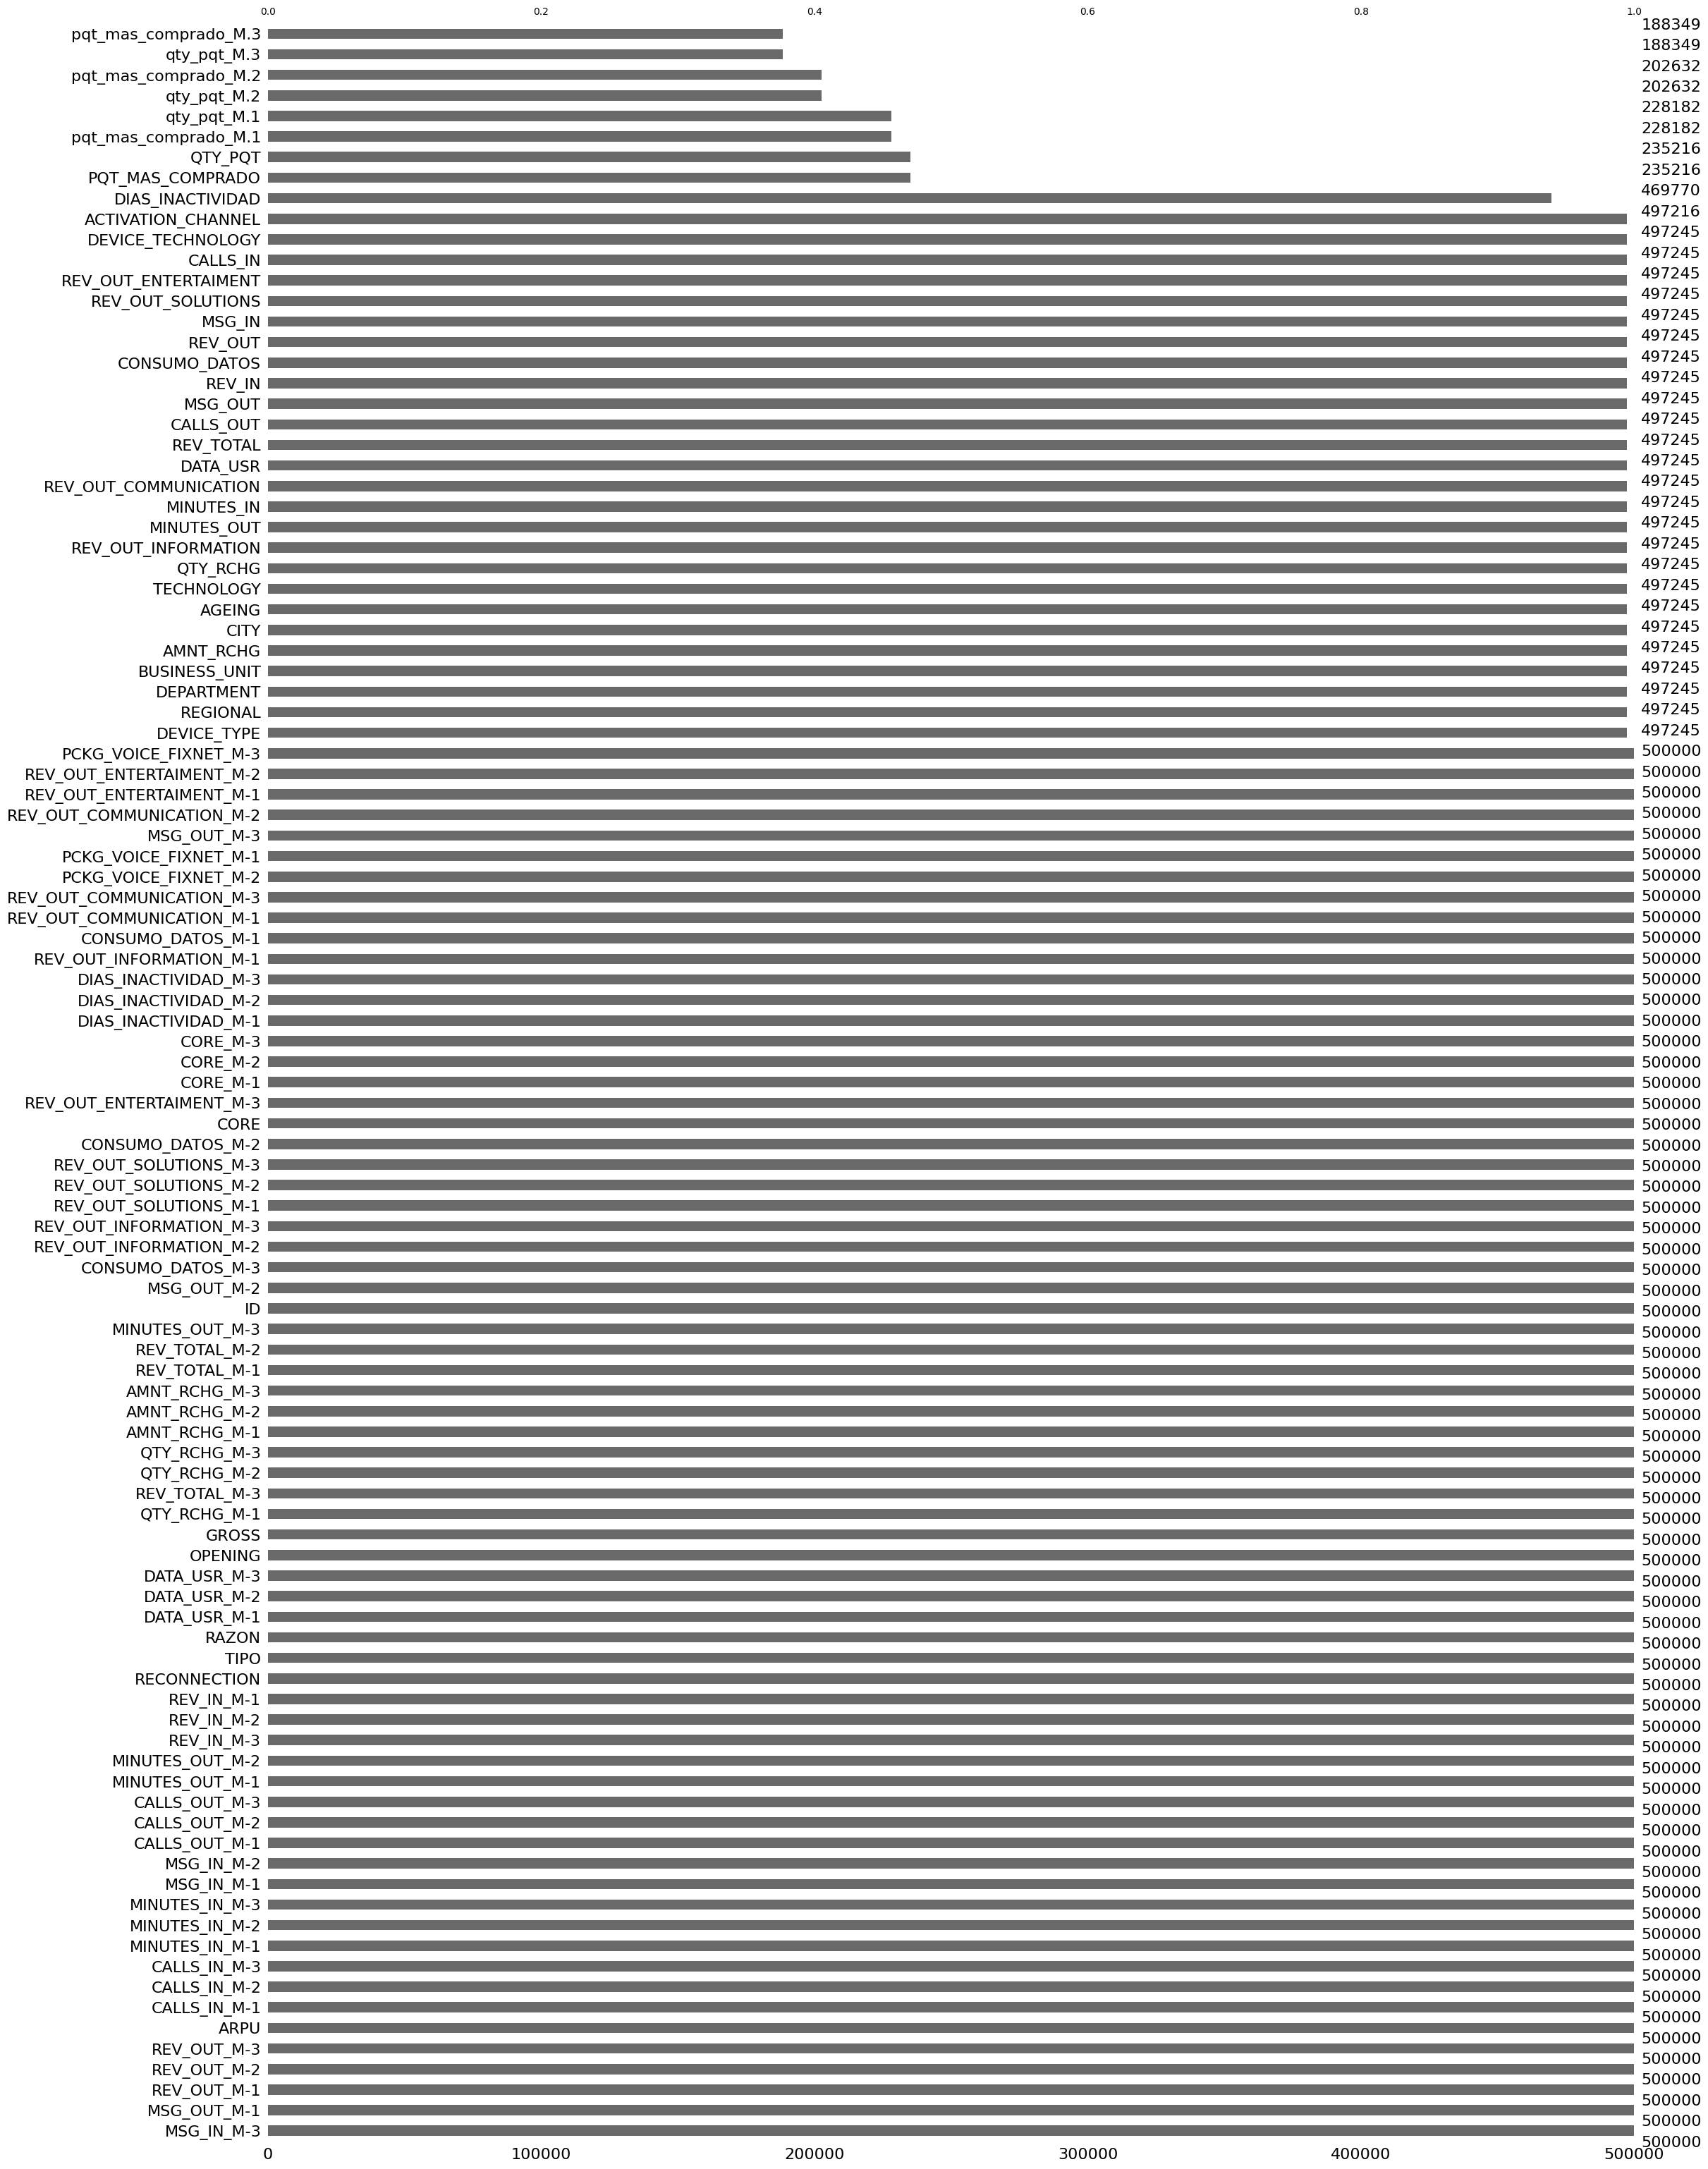

In [5]:
# Porcentaje de valores faltantes por columna
missing_data = df.isnull().mean() * 100
print(missing_data[missing_data > 0].sort_values(ascending=False))

# Visualización de los valores faltantes
msno.bar(df, sort="descending")

In [6]:
print(df[df['TIPO']=='Churn'].isnull().sum().sort_values(ascending=False))
df[(df['TIPO']=='Churn')].head()

pqt_mas_comprado_M.3    9159
pqt_mas_comprado_M.2    9159
QTY_PQT                 9159
PQT_MAS_COMPRADO        9159
qty_pqt_M.1             9159
                        ... 
CALLS_IN_M-2               0
CALLS_IN_M-1               0
ARPU                       0
REV_OUT_M-3                0
MSG_IN_M-3                 0
Length: 103, dtype: int64


,ID,TIPO,RAZON,ACTIVATION_CHANNEL,AGEING,BUSINESS_UNIT,TECHNOLOGY,DEVICE_TECHNOLOGY,DATA_USR,DATA_USR_M-1,...,DIAS_INACTIVIDAD_M-2,DIAS_INACTIVIDAD_M-3,QTY_PQT,PQT_MAS_COMPRADO,qty_pqt_M.1,pqt_mas_comprado_M.1,qty_pqt_M.2,pqt_mas_comprado_M.2,qty_pqt_M.3,pqt_mas_comprado_M.3
31,32,Churn,Port Out,DISTRIBUIDORES,1.0,MOBILE,4G,2G,N,N,...,0,0,NaN,None,NaN,None,NaN,None,NaN,None
47,48,Churn,Port Out,DISTRIBUIDORES,2.0,MOBILE,2G,4G,N,N,...,0,0,NaN,None,NaN,None,NaN,None,NaN,None
55,56,Churn,Port Out,DISTRIBUIDORES,1.0,MOBILE,2G,4G,Y,N,...,0,0,NaN,None,NaN,None,NaN,None,NaN,None
76,77,Churn,Port Out,AUTOACTIVACION,1.0,MOBILE,3G,2G,N,N,...,0,0,NaN,None,NaN,None,NaN,None,NaN,None
96,97,Churn,Port Out,None,NaN,None,None,None,None,N,...,0,0,NaN,None,NaN,None,NaN,None,NaN,None


In [7]:
df[(df['TIPO']=='Churn')].dropna(axis=1, how='all').head()

,ID,TIPO,RAZON,ACTIVATION_CHANNEL,AGEING,BUSINESS_UNIT,TECHNOLOGY,DEVICE_TECHNOLOGY,DATA_USR,DATA_USR_M-1,...,CONSUMO_DATOS_M-2,CONSUMO_DATOS_M-3,CORE,CORE_M-1,CORE_M-2,CORE_M-3,DIAS_INACTIVIDAD,DIAS_INACTIVIDAD_M-1,DIAS_INACTIVIDAD_M-2,DIAS_INACTIVIDAD_M-3
31,32,Churn,Port Out,DISTRIBUIDORES,1.0,MOBILE,4G,2G,N,N,...,0.0,0.0,NO CORE,NO CORE,NO CORE,NO CORE,1.0,2,0,0
47,48,Churn,Port Out,DISTRIBUIDORES,2.0,MOBILE,2G,4G,N,N,...,0.0,0.0,NO CORE,NO CORE,NO CORE,NO CORE,12.0,21,0,0
55,56,Churn,Port Out,DISTRIBUIDORES,1.0,MOBILE,2G,4G,Y,N,...,0.0,0.0,CORE,NO CORE,NO CORE,NO CORE,7.0,0,0,0
76,77,Churn,Port Out,AUTOACTIVACION,1.0,MOBILE,3G,2G,N,N,...,0.0,0.0,NO CORE,NO CORE,NO CORE,NO CORE,11.0,0,0,0
96,97,Churn,Port Out,None,NaN,None,None,None,None,N,...,0.0,0.0,NO CORE,NO CORE,NO CORE,NO CORE,0.0,0,0,0


In [42]:
numerical_columns = df.select_dtypes(include=[float, int]).columns
target = np.where(df['TIPO']=='Base',0,1)  # Assuming churn is binary (0 or 1)

for col in tqdm(numerical_columns):
    corr, p_value = pointbiserialr(df[col].fillna(-10), target)
    print(f'Feature: {col}, Correlation: {corr}, p-value: {p_value}')

  0%|          | 0/78 [00:00<?, ?it/s]

Feature: ID, Correlation: -0.0030783308872016244, p-value: 0.02950233415086828
Feature: AGEING, Correlation: -0.08188697774951771, p-value: 0.0
Feature: QTY_RCHG, Correlation: -0.22104640342310164, p-value: 0.0
Feature: QTY_RCHG_M-1, Correlation: -0.04544078631467402, p-value: 9.415281130865707e-227
Feature: QTY_RCHG_M-2, Correlation: -0.049992595419852674, p-value: 4.581104667580979e-274
Feature: QTY_RCHG_M-3, Correlation: -0.05074874638283465, p-value: 2.3056190923949467e-282
Feature: AMNT_RCHG, Correlation: -0.037729609476109635, p-value: 6.435463037988092e-157
Feature: AMNT_RCHG_M-1, Correlation: -0.045503717118655196, p-value: 2.2416028401024173e-227
Feature: AMNT_RCHG_M-2, Correlation: -0.04949794348873693, p-value: 1.0514043676407575e-268
Feature: AMNT_RCHG_M-3, Correlation: -0.05022555501024758, p-value: 1.3114125161586778e-276
Feature: REV_TOTAL, Correlation: -0.04633092648695904, p-value: 1.1950848456444824e-235
Feature: REV_TOTAL_M-1, Correlation: -0.046928850448550455, p-va

C:\Users\andre\OneDrive\Documents\Data Science\Pruebas_Tecnicas\tigo\Lib\site-packages\scipy\stats\_stats_py.py:5657: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


Feature: CALLS_IN_M-3, Correlation: -0.04316574434919915, p-value: 8.428246111705358e-205
Feature: MINUTES_IN, Correlation: -0.03123235352630866, p-value: 3.949002048046393e-108
Feature: MINUTES_IN_M-1, Correlation: -0.02949823912376283, p-value: 1.1641394221163585e-96
Feature: MINUTES_IN_M-2, Correlation: -0.03290374101980663, p-value: 8.38117186700424e-120
Feature: MINUTES_IN_M-3, Correlation: -0.03470643017460824, p-value: 4.489075249401403e-133
Feature: MSG_IN, Correlation: -0.02182904494472595, p-value: 9.191412812202626e-54
Feature: MSG_IN_M-1, Correlation: -0.011309206572601174, p-value: 1.2743304020628066e-15
Feature: MSG_IN_M-2, Correlation: -0.011928466865588504, p-value: 3.312628916111517e-17
Feature: MSG_IN_M-3, Correlation: -0.010677502650156897, p-value: 4.34153881354052e-14
Feature: CALLS_OUT, Correlation: -0.029116049877647317, p-value: 3.2059960236587255e-94
Feature: CALLS_OUT_M-1, Correlation: -0.028012628726106603, p-value: 2.3571014597978534e-87
Feature: CALLS_OUT_M

In [9]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns = categorical_columns.tolist()
categorical_columns.remove('TIPO')

def cramers_v(chi2, n, min_dim):
    return np.sqrt(chi2 / (n * (min_dim - 1)))

for col in categorical_columns:
    contingency_table = pd.crosstab(df[col].fillna('None'), df['TIPO'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape)
    cramers_v_value = cramers_v(chi2, n, min_dim)
    print(f'Feature: {col}, Cramér\'s V: {cramers_v_value}')

Feature: RAZON, Cramér's V: 0.9999443902276227
Feature: ACTIVATION_CHANNEL, Cramér's V: 0.5433151769275877
Feature: BUSINESS_UNIT, Cramér's V: 0.5448057446379415
Feature: TECHNOLOGY, Cramér's V: 0.5488372250915534
Feature: DEVICE_TECHNOLOGY, Cramér's V: 0.54519116144556
Feature: DATA_USR, Cramér's V: 0.5449201588794862
Feature: DATA_USR_M-1, Cramér's V: 0.06477092215865939
Feature: DATA_USR_M-2, Cramér's V: 0.06822401703730469
Feature: DATA_USR_M-3, Cramér's V: 0.06374634896708478
Feature: DEVICE_TYPE, Cramér's V: 0.5468097543566907
Feature: REGIONAL, Cramér's V: 0.5452684409887221
Feature: DEPARTMENT, Cramér's V: 0.5463712416938573
Feature: CITY, Cramér's V: 0.5500235014307328
Feature: OPENING, Cramér's V: 0.0924487292070894
Feature: GROSS, Cramér's V: 0.04435856813304994
Feature: RECONNECTION, Cramér's V: 0.2697065013173168
Feature: CORE, Cramér's V: 0.05077566272502729
Feature: CORE_M-1, Cramér's V: 0.07281600754397148
Feature: CORE_M-2, Cramér's V: 0.07484232809369962
Feature: CORE

In [10]:
from sklearn.feature_selection import VarianceThreshold

df_sample = df.sample(frac=0.05, random_state=42)

X_sample = df_sample.drop(columns=['TIPO','RAZON']).select_dtypes(include=[float, int])
# Eliminar variables con baja varianza
selector = VarianceThreshold(threshold=0.01)
X_high_variance = selector.fit_transform(X_sample)

# Nuevas columnas con alta varianza
columns_kept = X_sample.columns[selector.get_support()]
print(columns_kept)

Index(['ID', 'AGEING', 'QTY_RCHG', 'QTY_RCHG_M-1', 'QTY_RCHG_M-2',
       'QTY_RCHG_M-3', 'AMNT_RCHG', 'AMNT_RCHG_M-1', 'AMNT_RCHG_M-2',
       'AMNT_RCHG_M-3', 'REV_TOTAL', 'REV_TOTAL_M-1', 'REV_TOTAL_M-2',
       'REV_TOTAL_M-3', 'REV_IN', 'REV_IN_M-1', 'REV_IN_M-2', 'REV_IN_M-3',
       'REV_OUT', 'REV_OUT_M-1', 'REV_OUT_M-2', 'REV_OUT_M-3', 'CALLS_IN',
       'CALLS_IN_M-1', 'CALLS_IN_M-2', 'CALLS_IN_M-3', 'MINUTES_IN',
       'MINUTES_IN_M-1', 'MINUTES_IN_M-2', 'MINUTES_IN_M-3', 'MSG_IN',
       'MSG_IN_M-1', 'MSG_IN_M-2', 'MSG_IN_M-3', 'CALLS_OUT', 'CALLS_OUT_M-1',
       'CALLS_OUT_M-2', 'CALLS_OUT_M-3', 'MINUTES_OUT', 'MINUTES_OUT_M-1',
       'MINUTES_OUT_M-2', 'MINUTES_OUT_M-3', 'MSG_OUT', 'MSG_OUT_M-1',
       'MSG_OUT_M-2', 'MSG_OUT_M-3', 'REV_OUT_COMMUNICATION',
       'REV_OUT_COMMUNICATION_M-1', 'REV_OUT_COMMUNICATION_M-2',
       'REV_OUT_COMMUNICATION_M-3', 'REV_OUT_ENTERTAIMENT',
       'REV_OUT_ENTERTAIMENT_M-1', 'REV_OUT_ENTERTAIMENT_M-2',
       'REV_OUT_ENTERTAIME

## Entrenamiento del modelo

### Modelo limitado

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [12]:
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [13]:
cols = df[(df['TIPO']=='Churn')].dropna(axis=1, how='all').columns

X = df[cols].select_dtypes(include=[int, float]).fillna(0)
y = df['TIPO']
smote = SMOTE(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Train the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_res, y_res)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Base       0.99      1.00      1.00    147187
       Churn       0.96      0.65      0.78      2813

    accuracy                           0.99    150000
   macro avg       0.98      0.83      0.89    150000
weighted avg       0.99      0.99      0.99    150000



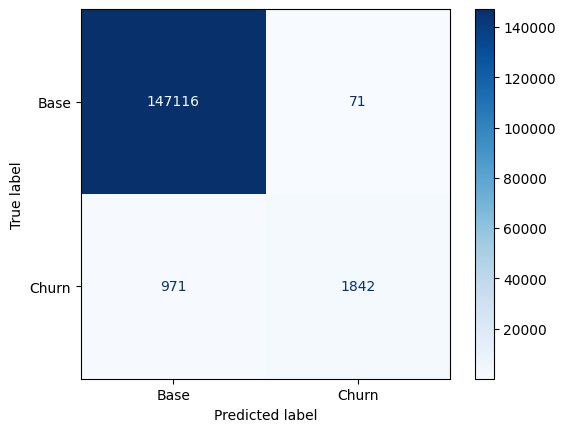

In [14]:
ConfusionMatrixDisplay.from_predictions(
   y_test, y_pred, cmap='Blues')
plt.show()

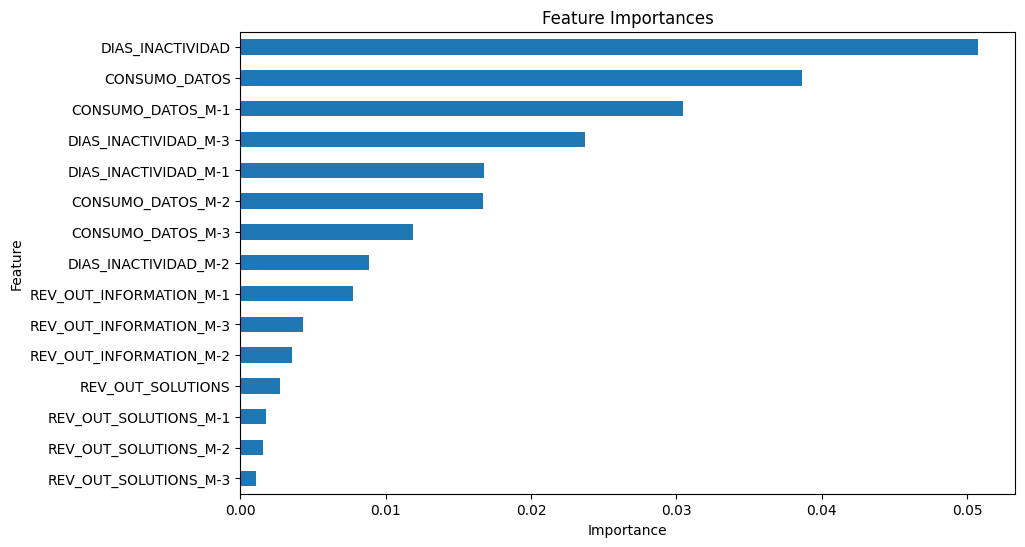

In [15]:
feature_importances = clf.feature_importances_

# Plot feature importances
importances = pd.Series(feature_importances, index=X_res.columns)
importances.tail(15).sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [16]:
df.groupby(['TIPO','RAZON'])[['DIAS_INACTIVIDAD','CONSUMO_DATOS']].describe()

DIAS_INACTIVIDAD                                           \
                          count      mean        std  min  25%  50%  75%   
TIPO  RAZON                                                                
Base  Base             460611.0  8.882938  30.544250 -1.0  0.0  1.0  6.0   
Churn Port Out           9159.0  7.650944  20.375223  0.0  0.0  0.0  7.0   

                       CONSUMO_DATOS                                         \
                   max         count          mean           std  min   25%   
TIPO  RAZON                                                                   
Base  Base      2844.0      490841.0  4.262587e+06  9.253730e+06  0.0  38.0   
Churn Port Out  1065.0        6404.0  3.409322e+06  8.317524e+06  0.0   0.0   

                                                  
                     50%        75%          max  
TIPO  RAZON                                       
Base  Base      118371.8  4146573.0  622075739.0  
Churn Port Out       0.0  2087471.9   85808135.8

### Modelo robusto sólo con variales numéricas 

In [18]:
X2 = df.drop(columns=['TIPO','RAZON','ID']).select_dtypes(include=[int, float]).fillna(0)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y, test_size=0.3, random_state=42)
X_res_2, y_res_2 = smote.fit_resample(X_train_2, y_train_2)

# Train the model
clf_2 = RandomForestClassifier(random_state=42)
clf_2.fit(X_res_2, y_res_2)

# Predict and evaluate
y_pred_2 = clf_2.predict(X_test_2)
print(classification_report(y_test_2, y_pred_2))

              precision    recall  f1-score   support

        Base       1.00      1.00      1.00    147187
       Churn       0.97      0.88      0.92      2813

    accuracy                           1.00    150000
   macro avg       0.98      0.94      0.96    150000
weighted avg       1.00      1.00      1.00    150000



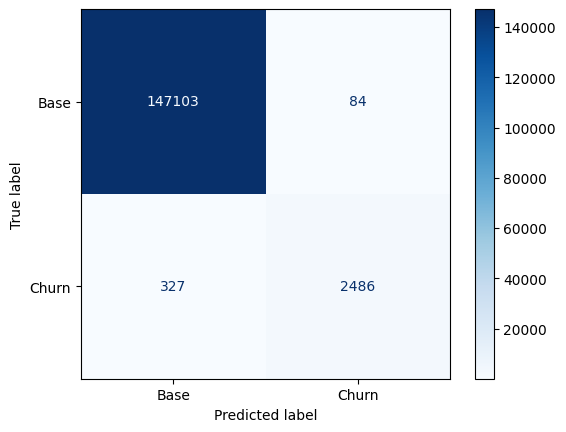

In [19]:
ConfusionMatrixDisplay.from_predictions(
   y_test_2, y_pred_2, cmap='Blues')
plt.show()

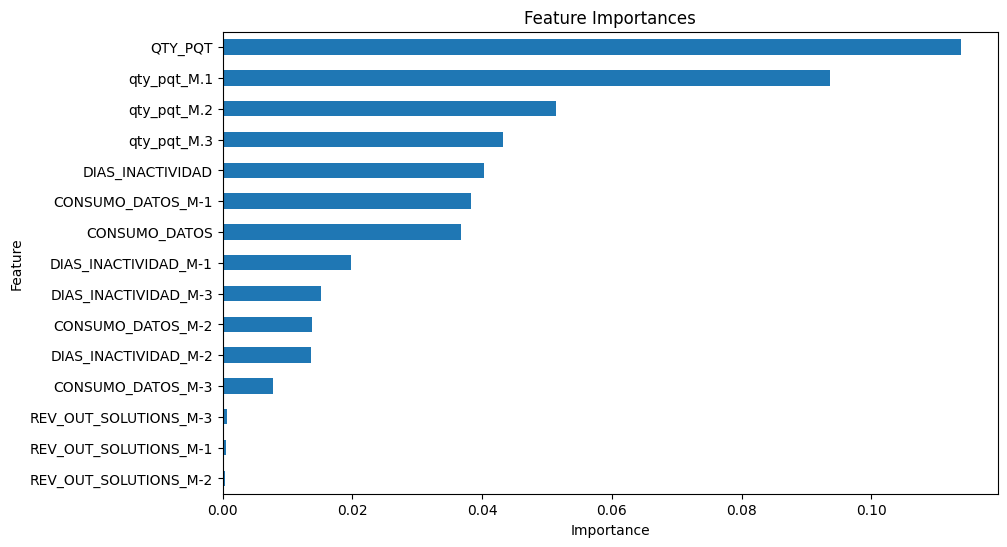

In [20]:
feature_importances_2 = clf_2.feature_importances_

# Plot feature importances
importances = pd.Series(feature_importances_2, index=X_res_2.columns)
importances.tail(15).sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [35]:
numerical_features = numerical_columns
numerical_features

Index(['ID', 'AGEING', 'QTY_RCHG', 'QTY_RCHG_M-1', 'QTY_RCHG_M-2',
       'QTY_RCHG_M-3', 'AMNT_RCHG', 'AMNT_RCHG_M-1', 'AMNT_RCHG_M-2',
       'AMNT_RCHG_M-3', 'REV_TOTAL', 'REV_TOTAL_M-1', 'REV_TOTAL_M-2',
       'REV_TOTAL_M-3', 'REV_IN', 'REV_IN_M-1', 'REV_IN_M-2', 'REV_IN_M-3',
       'REV_OUT', 'REV_OUT_M-1', 'REV_OUT_M-2', 'REV_OUT_M-3', 'ARPU',
       'CALLS_IN', 'CALLS_IN_M-1', 'CALLS_IN_M-2', 'CALLS_IN_M-3',
       'MINUTES_IN', 'MINUTES_IN_M-1', 'MINUTES_IN_M-2', 'MINUTES_IN_M-3',
       'MSG_IN', 'MSG_IN_M-1', 'MSG_IN_M-2', 'MSG_IN_M-3', 'CALLS_OUT',
       'CALLS_OUT_M-1', 'CALLS_OUT_M-2', 'CALLS_OUT_M-3', 'MINUTES_OUT',
       'MINUTES_OUT_M-1', 'MINUTES_OUT_M-2', 'MINUTES_OUT_M-3', 'MSG_OUT',
       'MSG_OUT_M-1', 'MSG_OUT_M-2', 'MSG_OUT_M-3', 'PCKG_VOICE_FIXNET_M-1',
       'PCKG_VOICE_FIXNET_M-2', 'PCKG_VOICE_FIXNET_M-3',
       'REV_OUT_COMMUNICATION', 'REV_OUT_COMMUNICATION_M-1',
       'REV_OUT_COMMUNICATION_M-2', 'REV_OUT_COMMUNICATION_M-3',
       'REV_OUT_ENTERTA

### Modelo más robusto con variables numéricas y categóricas

In [39]:
X3 = df.drop(columns=['TIPO','RAZON','ID'])

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y, test_size=0.3, random_state=42)


numerical_features = numerical_columns.to_list()
numerical_features.remove('ID')
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


categorical_features = categorical_columns

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('cat_encoder', OrdinalEncoder(handle_unknown='use_encoded_value',encoded_missing_value=-10, unknown_value=-5)),
    ('select', SelectKBest(chi2))  
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

model.fit(X_train_3, y_train_3)

score = model.score(X_test_3, y_test_3)
print(f'Model accuracy: {score:.2f}')

y_pred_3 = model.predict(X_test_3)
print(classification_report(y_test_3, y_pred_3))

Model accuracy: 1.00
              precision    recall  f1-score   support

        Base       1.00      1.00      1.00    147187
       Churn       0.96      0.83      0.89      2813

    accuracy                           1.00    150000
   macro avg       0.98      0.92      0.95    150000
weighted avg       1.00      1.00      1.00    150000



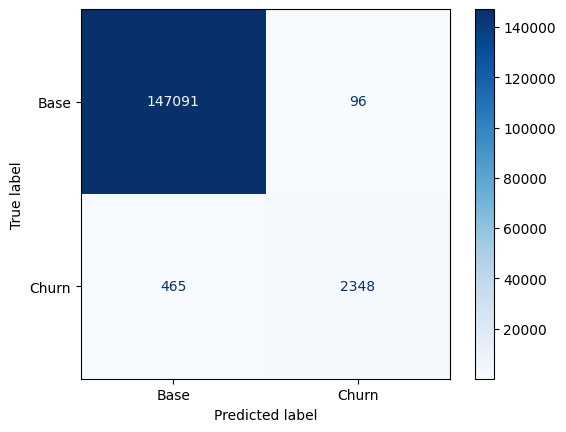

In [40]:
ConfusionMatrixDisplay.from_predictions(
   y_test_3, y_pred_3, cmap='Blues')
plt.show()

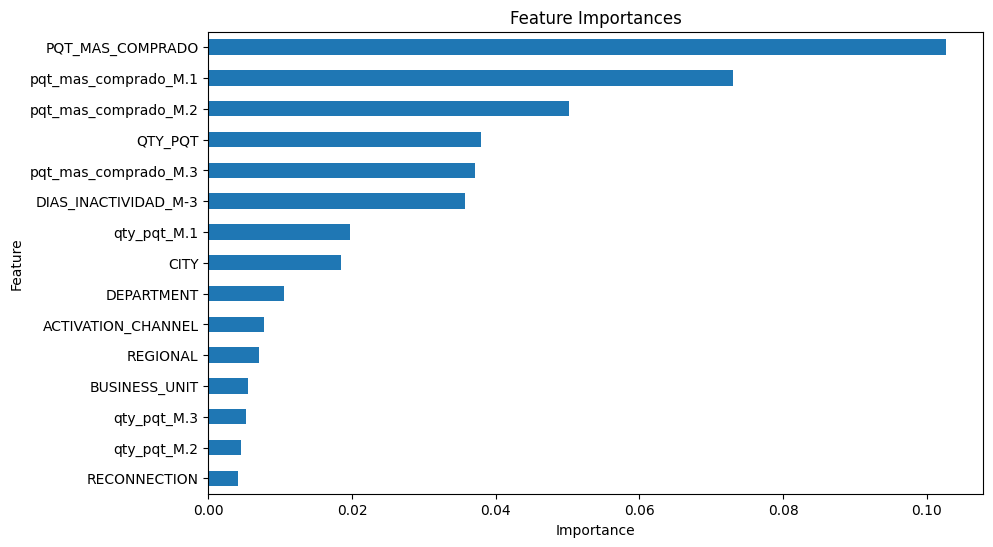

In [41]:

feature_importances_3 = model.named_steps['classifier'].feature_importances_

ordinal_indices = model.named_steps['preprocessor'].transformers_[1][1].named_steps['select'].get_support(indices=True)
all_features = list(numerical_features) + [categorical_features[i] for i in ordinal_indices]

importances = pd.Series(feature_importances_3, index=all_features)
importances.tail(15).sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Guardar y cargar modelo

In [46]:
import joblib

models = [clf, clf_2, model]

filename = '../models/modelo_base.sav'
joblib.dump(clf_2, open(filename, 'wb'))

loaded_model = joblib.load(open(filename, 'rb'))
result = loaded_model.score(X_test_2, y_test_2)
print(result)

0.99726
